In [3]:
# Loading libraries
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
df = pd.read_excel(r'F:\Personal\PGP\Predictive Modeling\Project\compactiv.xlsx')

In [5]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [6]:
df.tail()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[5 rows x 22 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

#### 13 columns are of float data type, 8 columns are of integer data type, and 1 column is of object data type.

In [8]:
print('The data set has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The data set has 8192 rows and 22 columns


In [9]:
df1 = df.drop('runqsz',axis = 1)

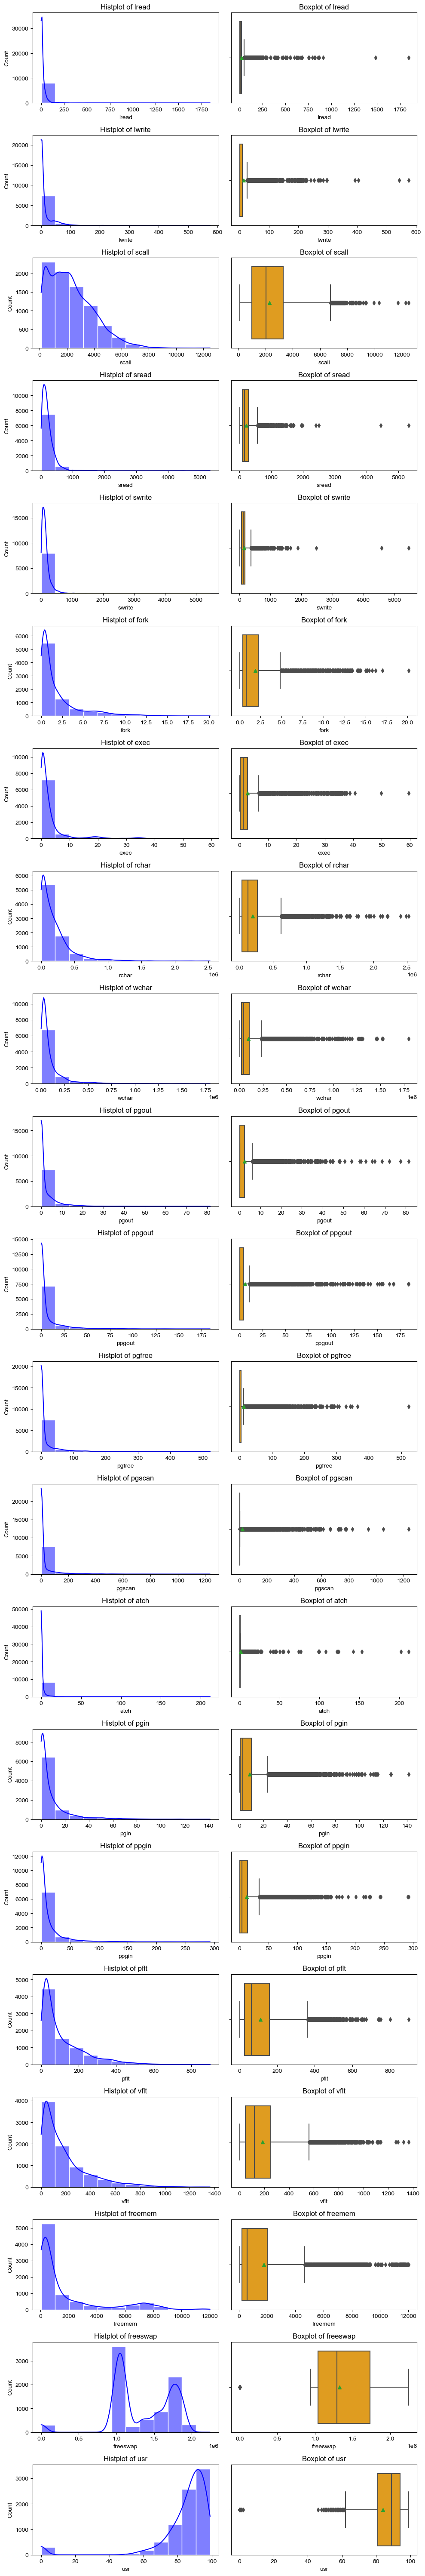

In [10]:
# Univariate Analysis
j=0
fig, axes = plt.subplots(nrows=21,ncols=2,squeeze=False)
fig.set_size_inches(10,60);
print('')
sns.set_style('whitegrid')
sns.set_style("whitegrid", {"grid.linestyle": " "})
for i in df1.columns:
    sns.histplot(x=df1[i],color='blue',bins=12,kde=True, ax=axes[j][0]).set(title='Histplot of {}'.format(i));
    sns.boxplot(x=i, color='orange',data=df1, ax=axes[j][1],showmeans=True).set(title='Boxplot of {}'.format(i));
    j=j+1
plt.tight_layout();   
plt.show();

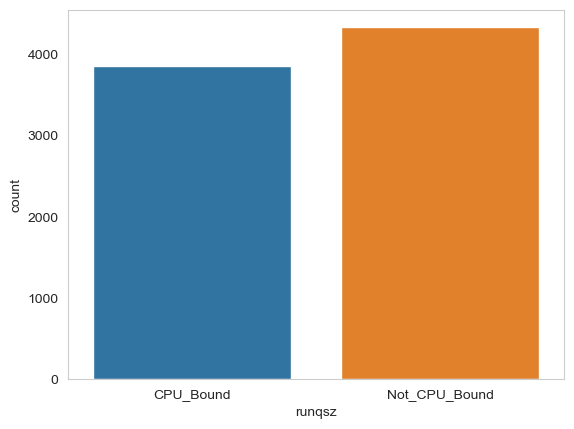

In [11]:
sns.countplot(data = df, x = 'runqsz');

<------Pair Plot showing interactions of the columns ['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec']----->


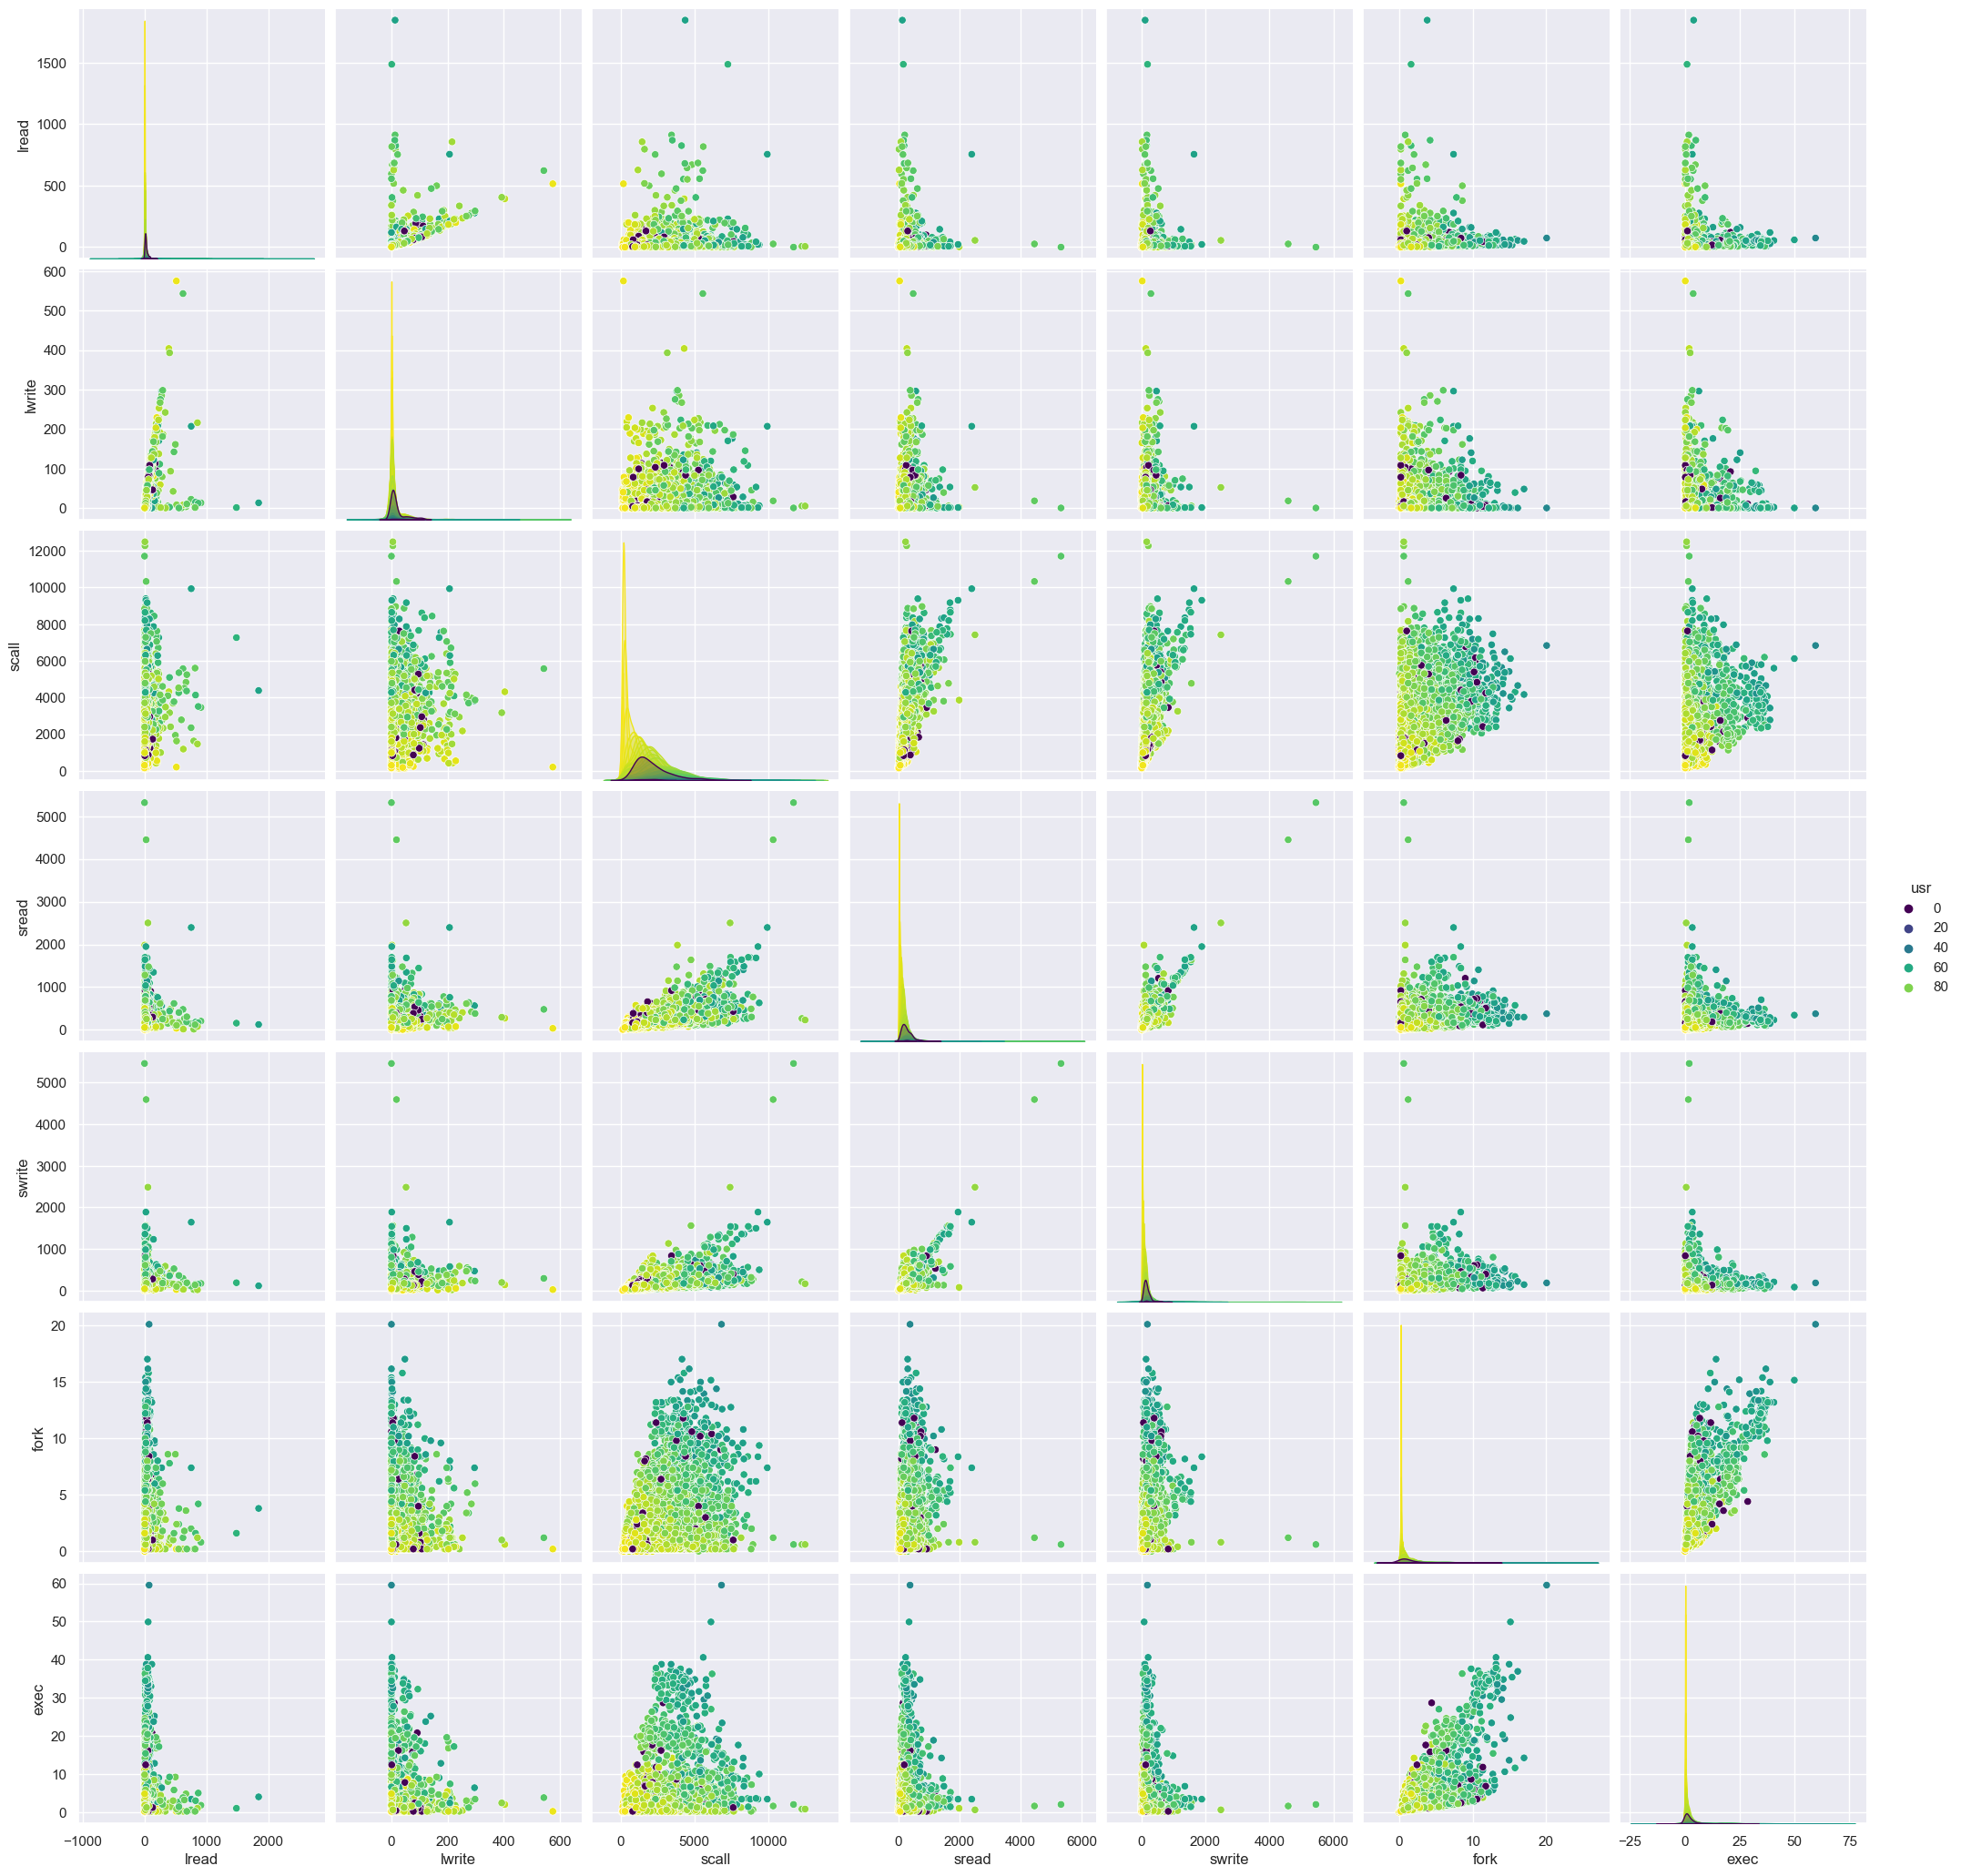

<------Pair Plot showing interactions of the columns ['rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch']----->


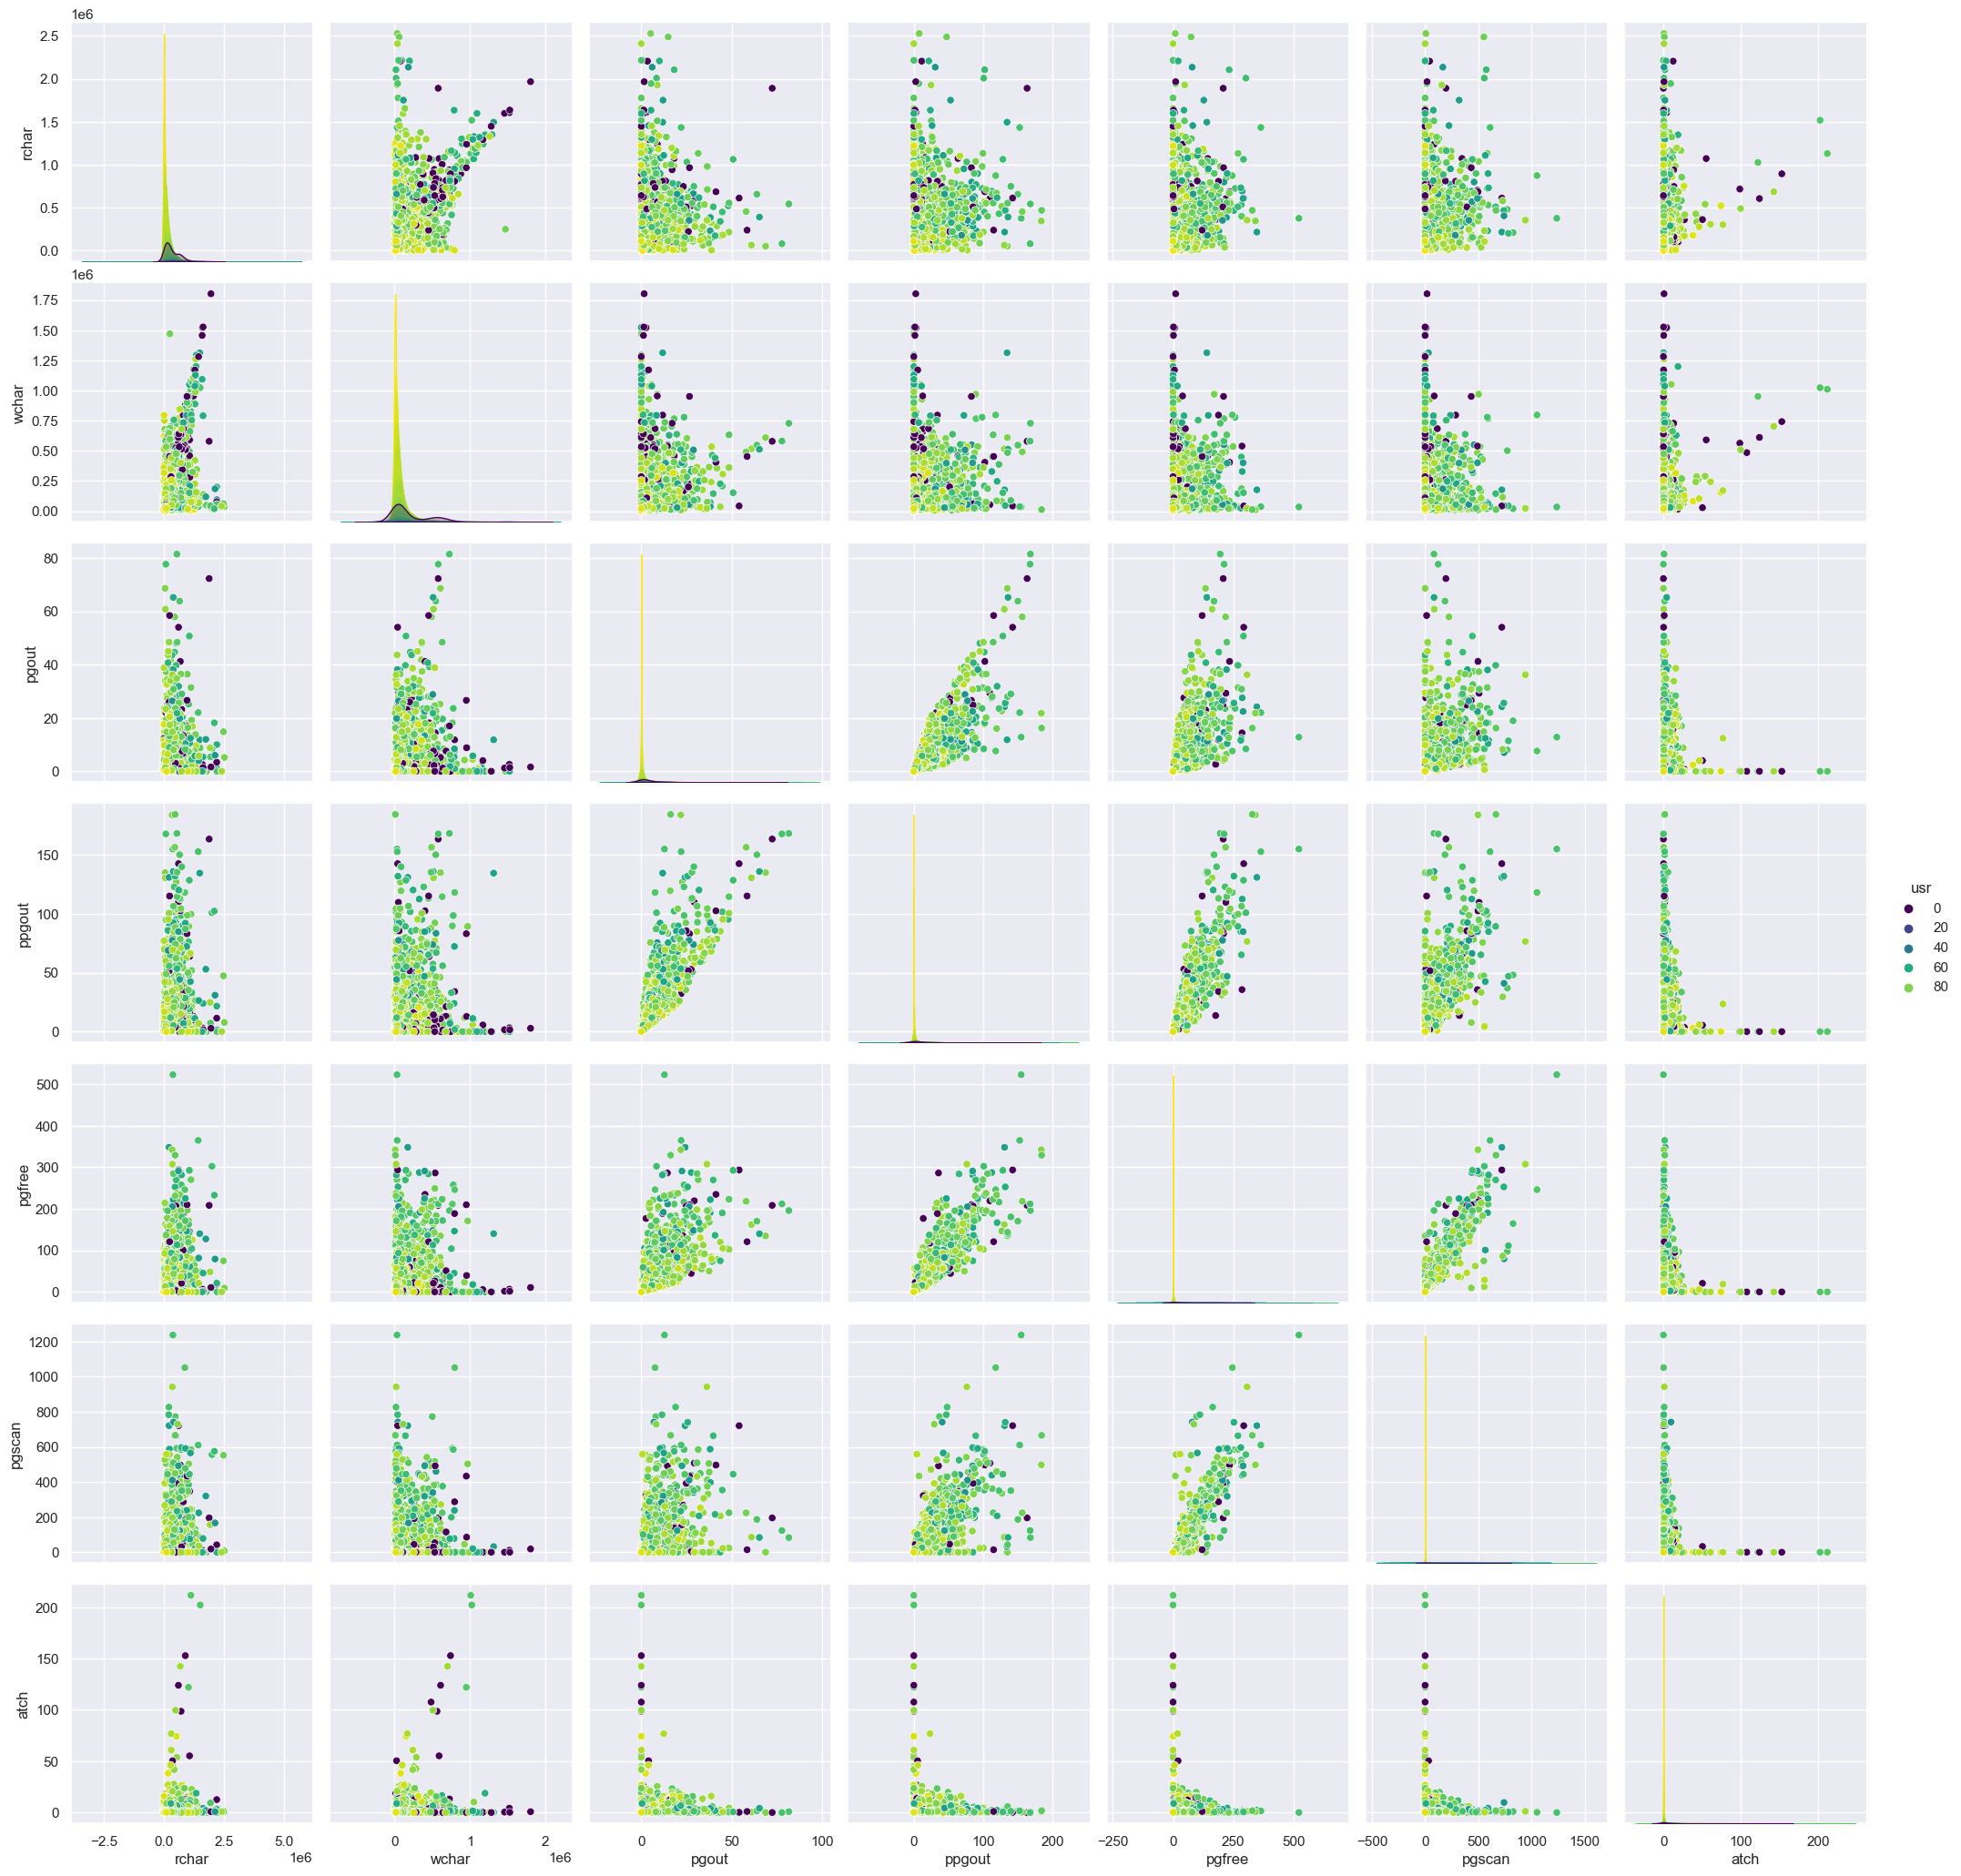

<------Pair Plot showing interactions of the columns ['pgin', 'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap', 'usr']----->


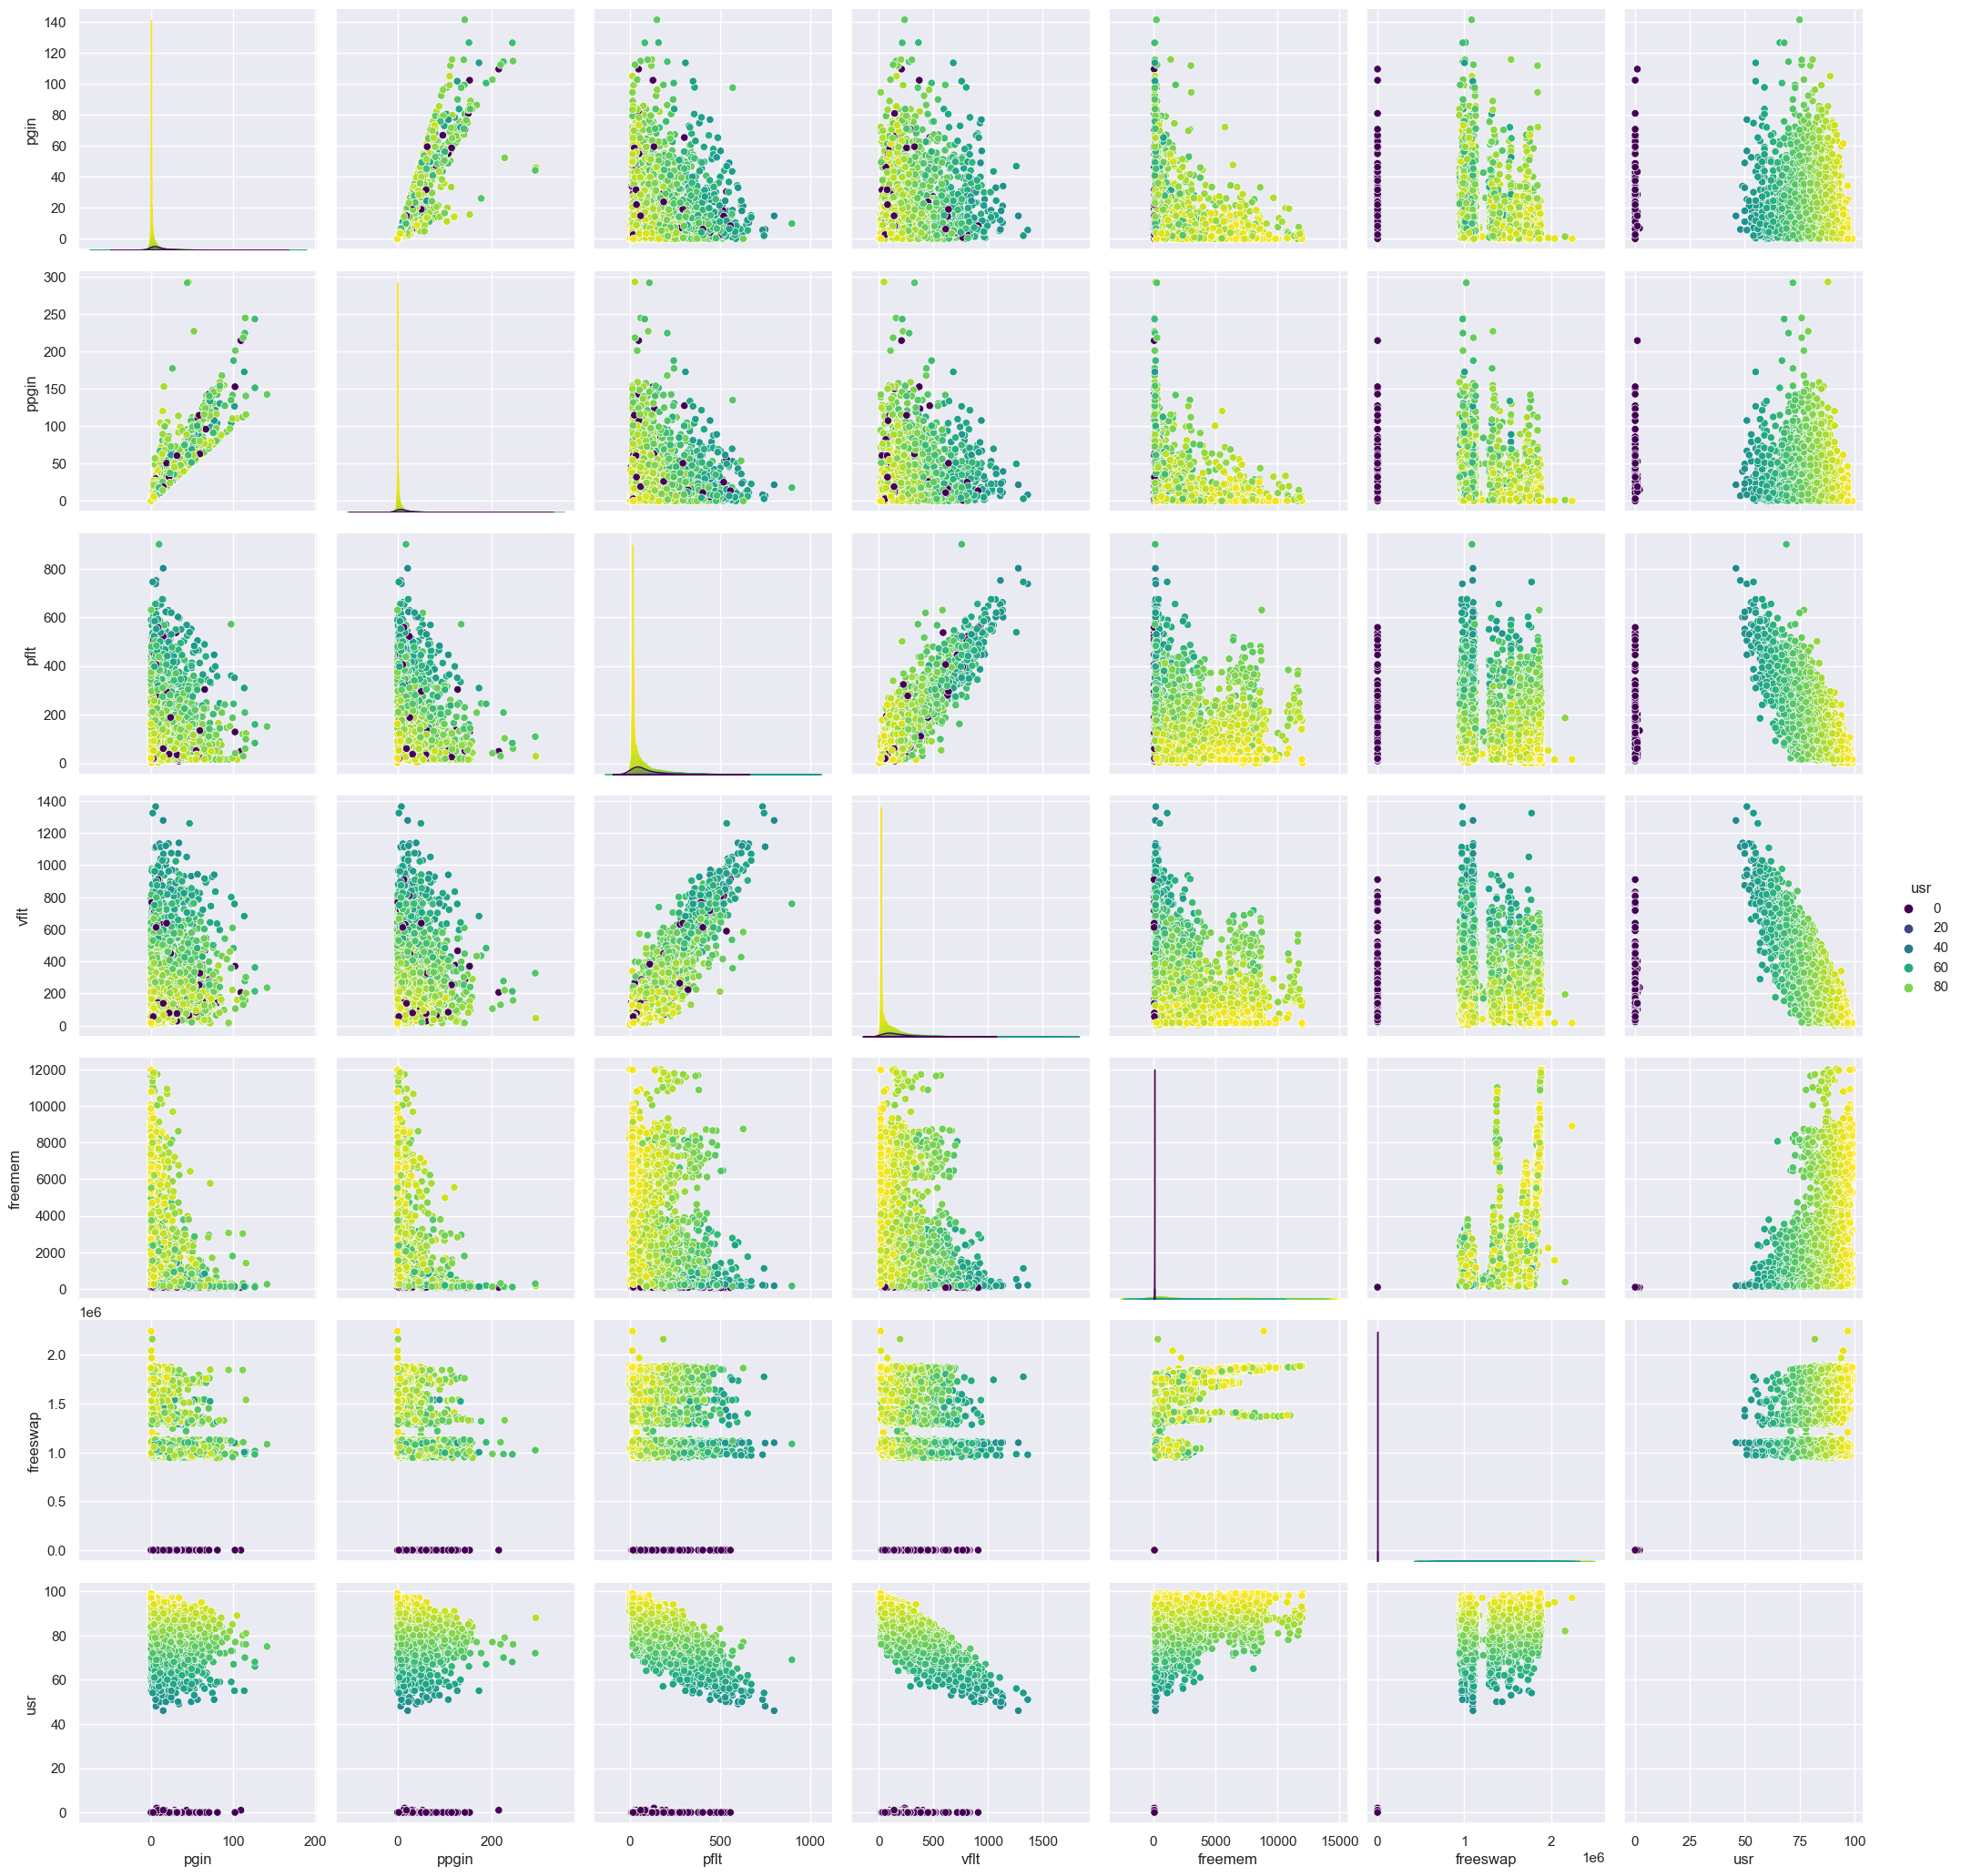

In [12]:
#Bivariate Analysis
k=0
list= [None] * 7
list
cmap = LinearSegmentedColormap.from_list('blue-yellow', ['gold', 'lightblue', 'darkblue'])
for i in df1.columns:
    list[k] = i
    k=k+1
    s = ' '
    if k == 7:
        s= print('<------Pair Plot showing interactions of the columns {}----->'.format(list[0:7]))
        sns.set(rc={"figure.figsize":(10,10)}) #width=3, #height=4
        sns.pairplot(df1, vars=list, height=3, hue = 'usr', palette='viridis');
        plt.title = s
        plt.show();
        k = 0

In [13]:
corr=df.corr()
corr

lread    lwrite     scall     sread    swrite      fork  \
lread     1.000000  0.533737  0.191377  0.132881  0.119953  0.140284   
lwrite    0.533737  1.000000  0.143404  0.128403  0.101524  0.052511   
scall     0.191377  0.143404  1.000000  0.696887  0.619984  0.446766   
sread     0.132881  0.128403  0.696887  1.000000  0.881069  0.416721   
swrite    0.119953  0.101524  0.619984  0.881069  1.000000  0.376876   
fork      0.140284  0.052511  0.446766  0.416721  0.376876  1.000000   
exec      0.110965  0.038237  0.308999  0.164084  0.103643  0.763974   
rchar     0.107973  0.115121  0.351413  0.502397  0.331386  0.281229   
wchar     0.081571  0.091718  0.274092  0.401784  0.394230  0.060790   
pgout     0.082463  0.067013  0.194529  0.193679  0.151371  0.130192   
ppgout    0.130590  0.079485  0.208400  0.225906  0.159442  0.166872   
pgfree    0.114438  0.065692  0.199778  0.212911  0.145458  0.168082   
pgscan    0.087783  0.042608  0.177908  0.194272  0.120180  0.160839   
atch      0.021563  0.028310  0.077969  0.085468  0.061373  0.047194   
pgin      0.189799  0.091068  0.241628  0.207012  0.147000  0.163468   
ppgin     0.161345  0.089011  0.219070  0.210225  0.144278  0.132181   
pflt      0.137463  0.067024  0.481781  0.452020  0.396580  0.931040   
vflt      0.165539  0.094965  0.531760  0.491045  0.416571  0.939348   
freemem  -0.083214 -0.091133 -0.387520 -0.286437 -0.248574 -0.123357   
freeswap -0.081293 -0.116478 -0.350629 -0.302036 -0.237062 -0.130442   
usr      -0.141394 -0.111213 -0.323188 -0.332160 -0.272252 -0.363277   

              exec     rchar     wchar     pgout  ...    pgfree    pgscan  \
lread     0.110965  0.107973  0.081571  0.082463  ...  0.114438  0.087783   
lwrite    0.038237  0.115121  0.091718  0.067013  ...  0.065692  0.042608   
scall     0.308999  0.351413  0.274092  0.194529  ...  0.199778  0.177908   
sread     0.164084  0.502397  0.401784  0.193679  ...  0.212911  0.194272   
swrite    0.103643  0.331386  0.394230  0.151371  ...  0.145458  0.120180   
fork      0.763974  0.281229  0.060790  0.130192  ...  0.168082  0.160839   
exec      1.000000  0.169189  0.000547  0.111465  ...  0.146163  0.144855   
rchar     0.169189  1.000000  0.503531  0.211268  ...  0.277786  0.259446   
wchar     0.000547  0.503531  1.000000  0.192436  ...  0.159229  0.113638   
pgout     0.111465  0.211268  0.192436  1.000000  ...  0.730381  0.553916   
ppgout    0.149334  0.269160  0.188876  0.872445  ...  0.917790  0.785256   
pgfree    0.146163  0.277786  0.159229  0.730381  ...  1.000000  0.915217   
pgscan    0.144855  0.259446  0.113638  0.553916  ...  0.915217  1.000000   
atch      0.052307  0.171532  0.181408  0.147759  ...  0.069290  0.038693   
pgin      0.186099  0.299784  0.178290  0.385648  ...  0.532834  0.496826   
ppgin     0.149911  0.347224  0.200880  0.414865  ...  0.593396  0.564991   
pflt      0.645239  0.313246  0.086128  0.151285  ...  0.190468  0.179157   
vflt      0.691754  0.363799  0.111082  0.229129  ...  0.301851  0.283031   
freemem  -0.158565 -0.149485 -0.149060 -0.269687  ... -0.234195 -0.193580   
freeswap -0.153347 -0.220608 -0.226044 -0.245378  ... -0.210184 -0.178119   
usr      -0.288526 -0.329737 -0.288974 -0.221877  ... -0.216278 -0.181488   

              atch      pgin     ppgin      pflt      vflt   freemem  \
lread     0.021563  0.189799  0.161345  0.137463  0.165539 -0.083214   
lwrite    0.028310  0.091068  0.089011  0.067024  0.094965 -0.091133   
scall     0.077969  0.241628  0.219070  0.481781  0.531760 -0.387520   
sread     0.085468  0.207012  0.210225  0.452020  0.491045 -0.286437   
swrite    0.061373  0.147000  0.144278  0.396580  0.416571 -0.248574   
fork      0.047194  0.163468  0.132181  0.931040  0.939348 -0.123357   
exec      0.052307  0.186099  0.149911  0.645239  0.691754 -0.158565   
rchar     0.171532  0.299784  0.347224  0.313246  0.363799 -0.149485   
wchar     0.181408  0.178290  0.200880  0.086128  0.111082 -0.149060   
pgout     0.1

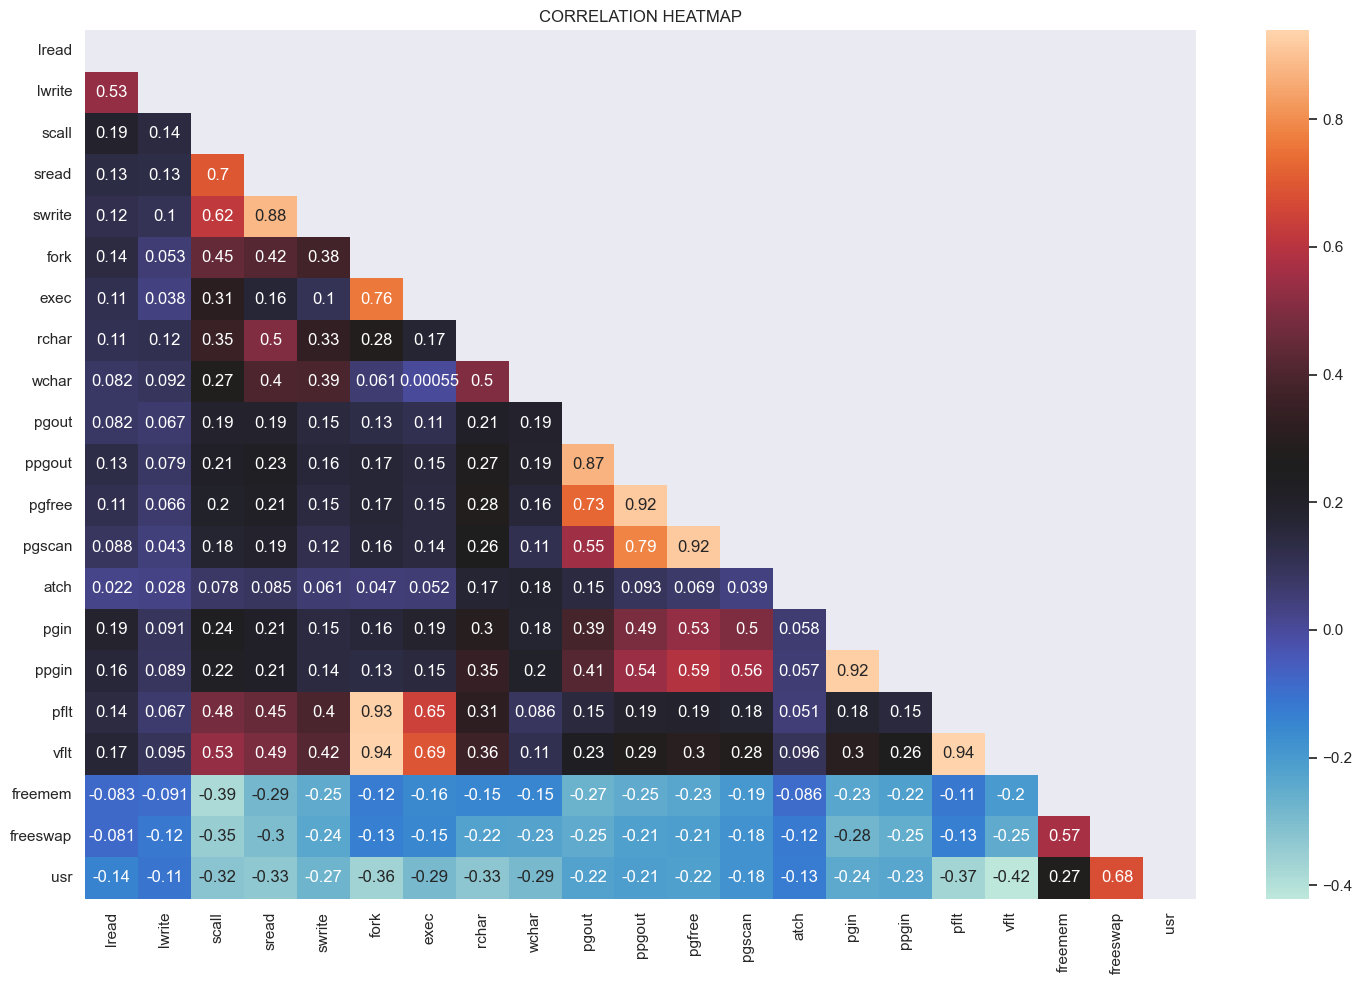

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap= 'icefire',mask = np.triu(corr)).set(title='CORRELATION HEATMAP')
plt.tight_layout()

In [15]:
df.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

In [16]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

#### 104 values are missing from column 'rchar', and 15 values are missing from column 'wchar.'

In [17]:
df.isnull().sum().sum()

119

#### Total 119 values are missing from the entire dataset.

In [18]:
df.duplicated().sum()

0

In [19]:
for i in df:
    count = (df[i] == 0).sum()
    print('There are {} zeroes in column {}'.format(count,i))

There are 675 zeroes in column lread
There are 2684 zeroes in column lwrite
There are 0 zeroes in column scall
There are 0 zeroes in column sread
There are 0 zeroes in column swrite
There are 21 zeroes in column fork
There are 21 zeroes in column exec
There are 0 zeroes in column rchar
There are 0 zeroes in column wchar
There are 4878 zeroes in column pgout
There are 4878 zeroes in column ppgout
There are 4869 zeroes in column pgfree
There are 6448 zeroes in column pgscan
There are 4575 zeroes in column atch
There are 1220 zeroes in column pgin
There are 1220 zeroes in column ppgin
There are 3 zeroes in column pflt
There are 0 zeroes in column vflt
There are 0 zeroes in column runqsz
There are 0 zeroes in column freemem
There are 0 zeroes in column freeswap
There are 283 zeroes in column usr


#### There are no duplicate values found in the dataset

In [20]:
for column in df.columns:
    if df[column].dtype == 'float64':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

FORK :  228
6.37        1
8.57        1
6.55        1
11.16       1
1.34        1
         ... 
1.00      398
0.80      563
0.60      716
0.40      966
0.20     1999
Name: fork, Length: 228, dtype: int64


EXEC :  386
34.47       1
31.66       1
4.37        1
32.73       1
14.83       1
         ... 
1.00      344
0.80      453
0.60      571
0.40      595
0.20     2060
Name: exec, Length: 386, dtype: int64


RCHAR :  7898
3089.0      1
249554.0    1
104451.0    1
89137.0     1
6559.0      1
           ..
425.0       4
7018.0      4
7001.0      5
6994.0      5
452.0       6
Name: rchar, Length: 7898, dtype: int64


WCHAR :  7925
133012.0    1
24594.0     1
68942.0     1
14682.0     1
9167.0      1
           ..
8482.0      3
25473.0     3
21962.0     3
13554.0     3
18709.0     4
Name: wchar, Length: 7925, dtype: int64


PGOUT :  404
14.74       1
23.65       1
38.12       1
26.00       1
29.60       1
         ... 
0.80      126
0.60      135
0.40      140
0.20      140
0.00     4878
N

In [21]:
for column in df.columns:
    if df[column].dtype == 'int64':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

LREAD :  235
129       1
817       1
556       1
147       1
226       1
       ... 
4       408
3       539
0       675
2       732
1      1050
Name: lread, Length: 235, dtype: int64


LWRITE :  189
267       1
229       1
298       1
404       1
179       1
       ... 
4       253
3       284
2       615
1      1529
0      2684
Name: lwrite, Length: 189, dtype: int64


SCALL :  4115
5180     1
4527     1
6825     1
3848     1
1999     1
        ..
230      9
160      9
419      9
220     10
158     10
Name: scall, Length: 4115, dtype: int64


SREAD :  794
674      1
594      1
1077     1
717      1
990      1
        ..
95      37
12      38
43      40
10      41
16      43
Name: sread, Length: 794, dtype: int64


SWRITE :  640
612      1
1360     1
613      1
450      1
636      1
        ..
22      50
118     51
24      53
91      56
30      56
Name: swrite, Length: 640, dtype: int64


FREEMEM :  3165
610      1
2935     1
2574     1
8313     1
6118     1
        ..
139     28
136 

In [22]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

RUNQSZ :  2
CPU_Bound        3861
Not_CPU_Bound    4331
Name: runqsz, dtype: int64




In [23]:
df = pd.get_dummies(df, columns=['runqsz'],drop_first=True)

In [24]:
df['pgin_rate'] = (df['pgin']+df['ppgin']/2)
df['pgout_rate'] = (df['pgout']+df['ppgout']/2)

In [25]:
df_new = df.drop(['pgin','ppgin','pgout','ppgout'], axis = 1)

In [26]:
df_new

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
0         1       0   2147     79      68   0.2  0.20   40671.0  53995.0   
1         0       0    170     18      21   0.2  0.20     448.0   8385.0   
2        15       3   2162    159     119   2.0  2.40       NaN  31950.0   
3         0       0    160     12      16   0.2  0.20       NaN   8670.0   
4         5       1    330     39      38   0.4  0.40       NaN  12185.0   
...     ...     ...    ...    ...     ...   ...   ...       ...      ...   
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgfree  pgscan  atch    pflt    vflt  freemem  freeswap  usr  \
0       0.00    0.00   0.0   16.00   26.40     4670   1730946   95   
1       0.00    0.00   0.0   15.63   16.83     7278   1869002   97   
2       0.00    0.00   1.2  150.20  220.20      702   1021237   87   
3       0.00    0.00   0.0   15.60   16.80     7248   1863704   98   
4       0.00    0.00   0.0   37.80   47.60      633   1760253   90   
...      ...     ...   ...     ...     ...      ...       ...  ...   
8187   43.69   55.11   0.6  139.28  270.74      387    986647   80   
8188    4.80    0.20   0.8  122.40  212.60      263   1055742   90   
8189    0.60    0.00   0.4   60.20  219.80      400    969106   87   
8190   13.03   18.04   0.4   93.19  202.81      141   1022458   83   
8191    0.00    0.00   0.2   91.80  110.00      659   1756514   94   

      runqsz_Not_CPU_Bound  pgin_rate  pgout_rate  
0                        0      2.900        0.00  
1                        1      0.000        0.00  
2                        1     10.700        0.00  
3                        1      0.300        0.00  
4                        1      1.600        0.00  
...                    ...        ...         ...  
8187                     0     59.820       18.34  
8188                     1      6.000        6.20  
8189                     1     51.000        0.70  
8190                     0     35.175        2.20  
8191                     0      6.500        0.00  

[8192 rows x 20 columns]

In [27]:
df_new['rchar'].fillna(df_new['rchar'].median(),inplace = True)
df_new['wchar'].fillna(df_new['wchar'].median(),inplace = True)

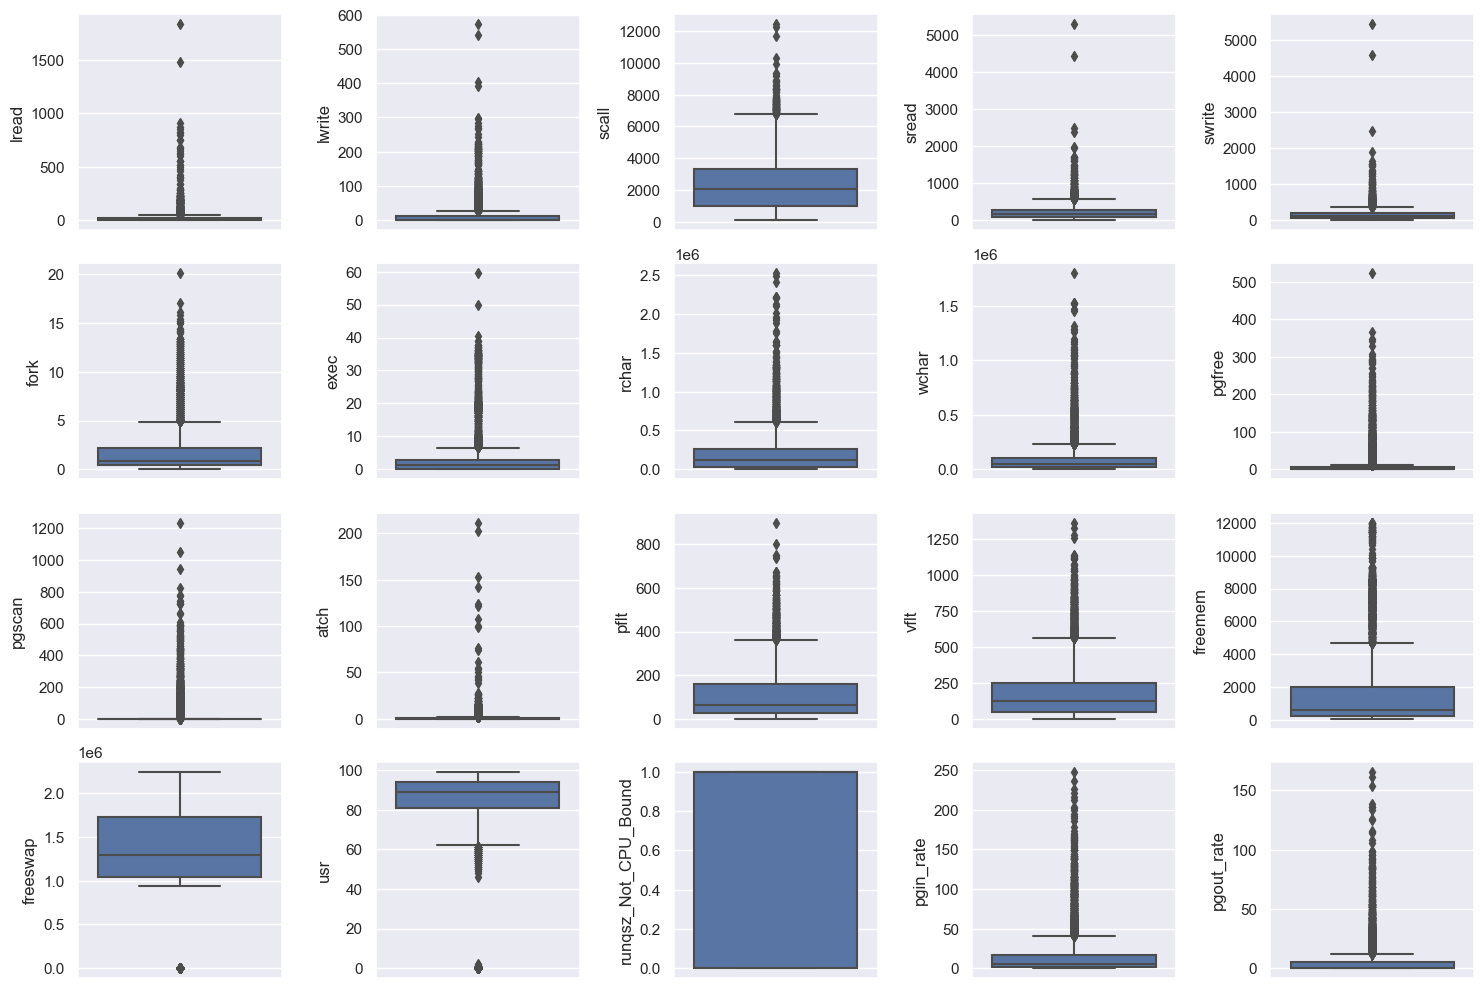

In [28]:
plt.figure(figsize = (15,30))
feature_list = df_new.columns
for i in range(len(feature_list)):
    plt.subplot(12, 5, i + 1)
    sns.boxplot(y = df_new[feature_list[i]], data = df_new)
    plt.tight_layout() 

In [29]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [30]:
for i in feature_list:
    LL, UL = remove_outlier(df_new[i])
    df_new[i] = np.where(df_new[i] > UL, UL, df_new[i])
    df_new[i] = np.where(df_new[i] < LL, LL, df_new[i])

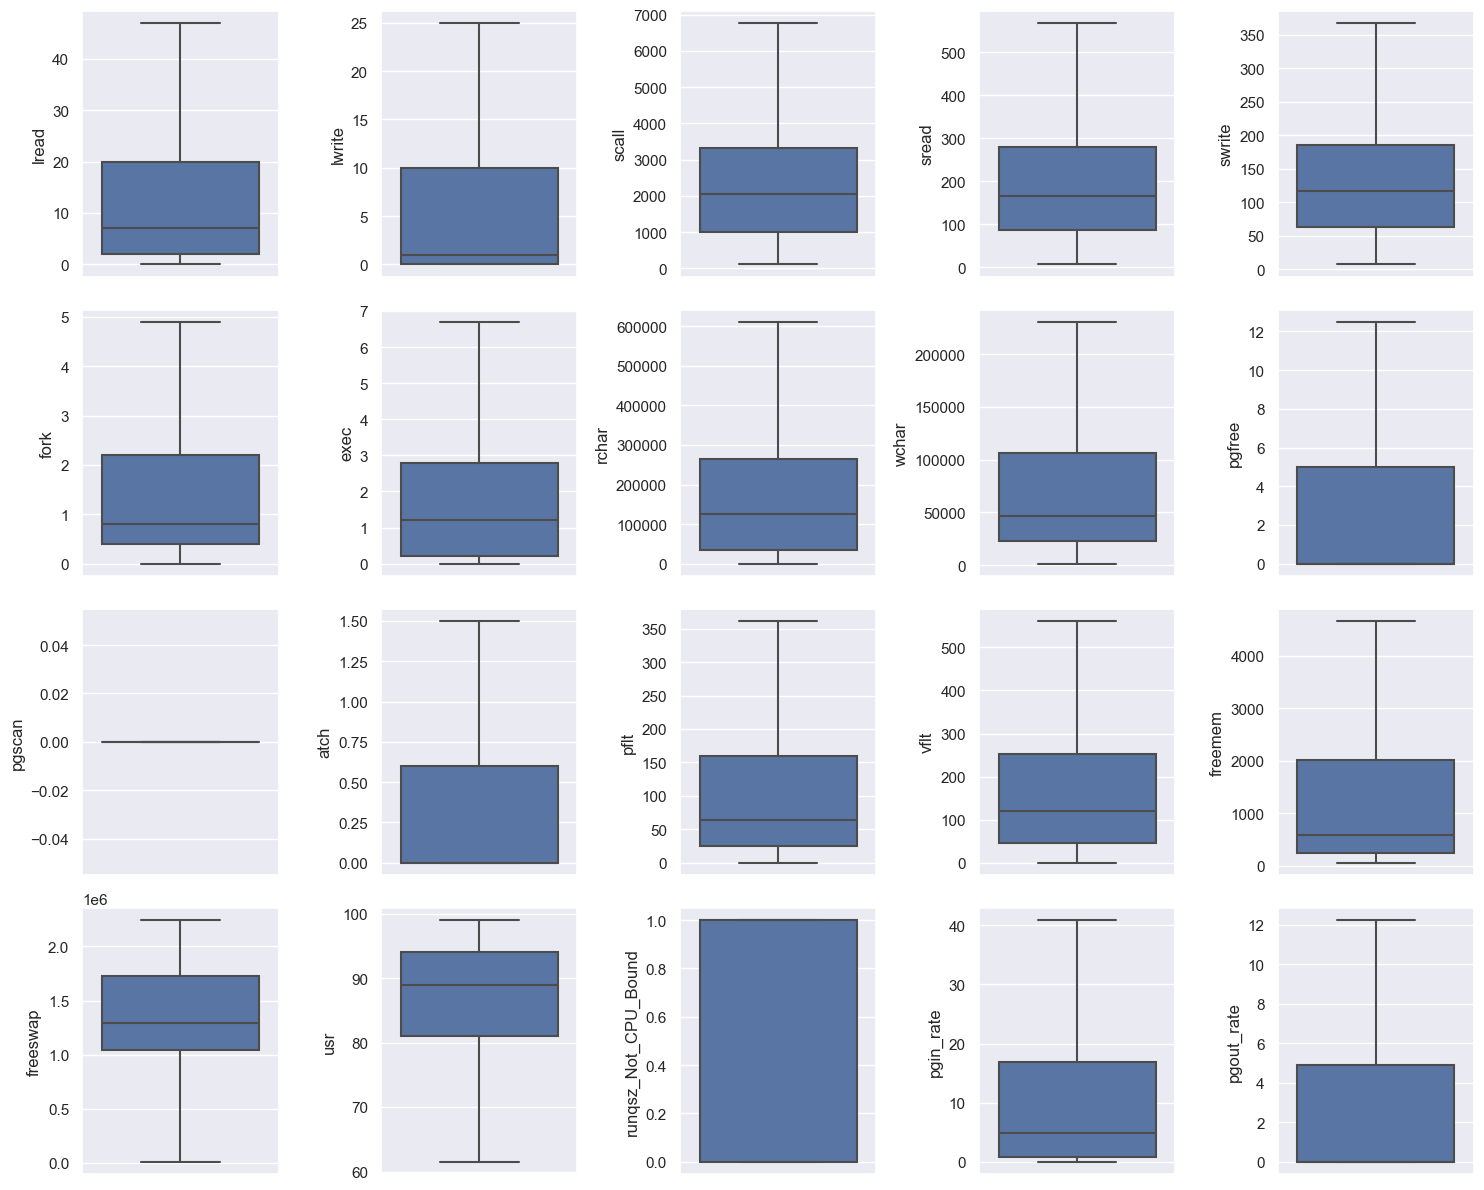

In [31]:
plt.figure(figsize = (15,15))
feature_list = df_new.columns
for i in range(len(feature_list)):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y = df_new[feature_list[i]], data = df_new)
    plt.tight_layout()

In [32]:
df_copy = df_new.copy() 
df_copy = df_copy.drop(['pgscan','fork','sread'], axis = 1)

In [33]:
df_copy

lread  lwrite   scall  swrite  exec     rchar    wchar  pgfree  atch  \
0       1.0     0.0  2147.0    68.0  0.20   40671.0  53995.0     0.0   0.0   
1       0.0     0.0   170.0    21.0  0.20     448.0   8385.0     0.0   0.0   
2      15.0     3.0  2162.0   119.0  2.40  125473.5  31950.0     0.0   1.2   
3       0.0     0.0   160.0    16.0  0.20  125473.5   8670.0     0.0   0.0   
4       5.0     1.0   330.0    38.0  0.40  125473.5  12185.0     0.0   0.0   
...     ...     ...     ...     ...   ...       ...      ...     ...   ...   
8187   16.0    12.0  3009.0   244.0  5.81  405250.0  85282.0    12.5   0.6   
8188    4.0     0.0  1596.0   146.0  1.80   89489.0  41764.0     4.8   0.8   
8189   16.0     5.0  3116.0   190.0  0.60  325948.0  52640.0     0.6   0.4   
8190   32.0    25.0  5180.0   179.0  1.20   62571.0  29505.0    12.5   0.4   
8191    2.0     0.0   985.0    46.0  4.80  111111.0  22256.0     0.0   0.2   

        pflt    vflt   freemem   freeswap   usr  runqsz_Not_CPU_Bound  \
0      16.00   26.40  4659.125  1730946.0  95.0                   0.0   
1      15.63   16.83  4659.125  1869002.0  97.0                   1.0   
2     150.20  220.20   702.000  1021237.0  87.0                   1.0   
3      15.60   16.80  4659.125  1863704.0  98.0                   1.0   
4      37.80   47.60   633.000  1760253.0  90.0                   1.0   
...      ...     ...       ...        ...   ...                   ...   
8187  139.28  270.74   387.000   986647.0  80.0                   0.0   
8188  122.40  212.60   263.000  1055742.0  90.0                   1.0   
8189   60.20  219.80   400.000   969106.0  87.0                   1.0   
8190   93.19  202.81   141.000  1022458.0  83.0                   0.0   
8191   91.80  110.00   659.000  1756514.0  94.0                   0.0   

      pgin_rate  pgout_rate  
0         2.900        0.00  
1         0.000        0.00  
2        10.700        0.00  
3         0.300        0.00  
4         1.600        0.00  
...         ...         ...  
8187     40.900       12.25  
8188      6.000        6.20  
8189     40.900        0.70  
8190     35.175        2.20  
8191      6.500        0.00  

[8192 rows x 17 columns]

In [34]:
## Now dataset is ready for linear regression.We seperate the dependent and independent variables
# Copy all the predictor variables into X dataframe
X = df_copy.drop('usr', axis=1)

# Copy target into the y dataframe. 
y = df_copy[['usr']]

In [35]:
X.head()

lread  lwrite   scall  swrite  exec     rchar    wchar  pgfree  atch  \
0    1.0     0.0  2147.0    68.0   0.2   40671.0  53995.0     0.0   0.0   
1    0.0     0.0   170.0    21.0   0.2     448.0   8385.0     0.0   0.0   
2   15.0     3.0  2162.0   119.0   2.4  125473.5  31950.0     0.0   1.2   
3    0.0     0.0   160.0    16.0   0.2  125473.5   8670.0     0.0   0.0   
4    5.0     1.0   330.0    38.0   0.4  125473.5  12185.0     0.0   0.0   

     pflt    vflt   freemem   freeswap  runqsz_Not_CPU_Bound  pgin_rate  \
0   16.00   26.40  4659.125  1730946.0                   0.0        2.9   
1   15.63   16.83  4659.125  1869002.0                   1.0        0.0   
2  150.20  220.20   702.000  1021237.0                   1.0       10.7   
3   15.60   16.80  4659.125  1863704.0                   1.0        0.3   
4   37.80   47.60   633.000  1760253.0                   1.0        1.6   

   pgout_rate  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

In [36]:
y.head()

usr
0  95.0
1  97.0
2  87.0
3  98.0
4  90.0

In [34]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# Linear Regression Model
## Method 1 (Scikit Learn)

In [35]:
# Invoke the LinearRegression function and find the bestfit model on training data
## We fit regression model on training data
## LinearRegression() -  We create an object, that is, we invoke the linear regression function

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [36]:
model_coeff = pd.DataFrame()
model_coeff["Columns"]= X_train.columns
model_coeff['Coefficient Estimate'] = round(pd.Series(regression_model.coef_[0]),3)
print(model_coeff)

                 Columns  Coefficient Estimate
0                  lread                -0.064
1                 lwrite                 0.048
2                  scall                -0.001
3                 swrite                -0.005
4                   exec                -0.313
5                  rchar                -0.000
6                  wchar                -0.000
7                 pgfree                 0.112
8                   atch                 0.574
9                   pflt                -0.034
10                  vflt                -0.005
11               freemem                -0.000
12              freeswap                 0.000
13  runqsz_Not_CPU_Bound                 1.609
14             pgin_rate                -0.043
15            pgout_rate                -0.270


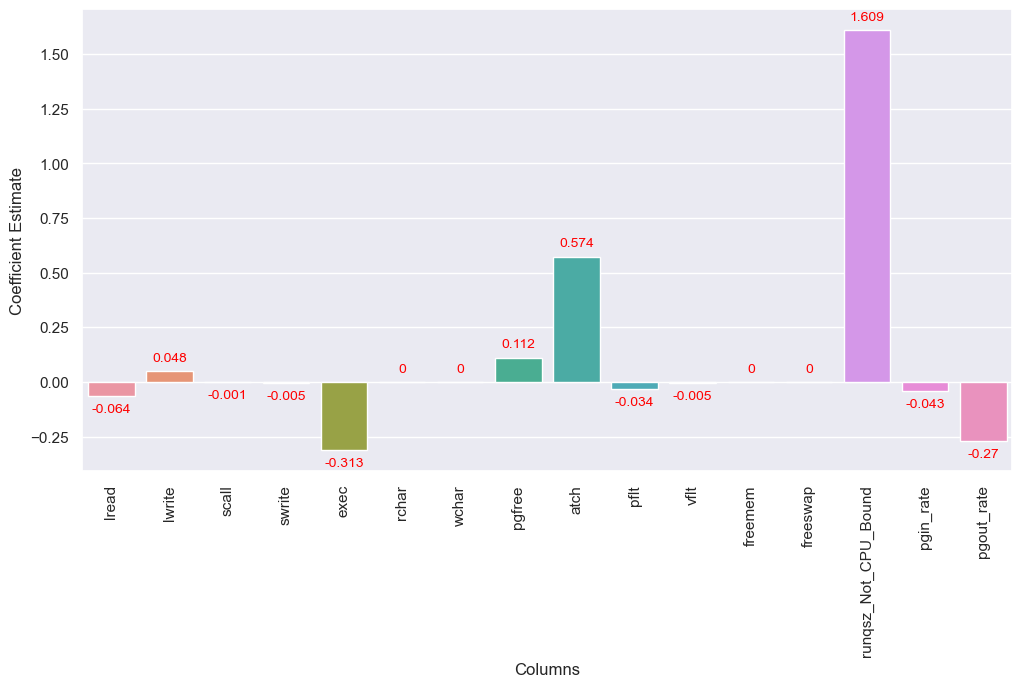

In [37]:
plt.subplots(figsize =(12, 6))
ax=sns.barplot(x ='Columns', y = 'Coefficient Estimate', data = model_coeff)
ax.bar_label(ax.containers[0], label_type='edge', color = 'red',rotation =0, fontsize = 10,padding =5)
plt.xticks(rotation=90);
plt.show()

In [38]:
# R square on training data
## The score here is the coefficient of determination
regression_model.score(X_train, y_train)

0.7958758214771178

In [39]:
# R square on testing data
regression_model.score(X_test, y_test)

0.7670021877691542

In [40]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

4.422058328844447

In [41]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

4.659597584084691

## Method 2 (Statsmodel)

In [42]:
# concatenate X and y into a single dataframe -  Adding dependent and independent variable
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

lread  lwrite   scall  swrite  exec     rchar       wchar  pgfree  atch  \
694     1.0     1.0  1345.0   192.0   0.6  198703.0  230625.875   12.50   1.5   
5535    1.0     1.0  1429.0    67.0   0.2    7163.0   24842.000    0.00   0.0   
4244   47.0    25.0  3273.0   180.0   0.4   83246.0   53705.000    7.19   1.5   
2472   13.0     8.0  4349.0   191.0   3.0   96009.0   70467.000    0.00   0.0   
7052   17.0    23.0   225.0    13.0   1.6   17132.0   12514.000    0.00   0.0   

        pflt    vflt  freemem   freeswap  runqsz_Not_CPU_Bound  pgin_rate  \
694    28.20   56.60    121.0  1375446.0                   0.0      7.500   
5535   15.77   30.74   1476.0  1021541.0                   1.0      2.400   
4244   59.88   74.05     82.0    10989.5                   0.0      6.285   
2472  129.00  236.80    772.0   993909.0                   0.0      4.400   
7052   19.80   23.80   4179.0  1821682.0                   1.0      0.000   

      pgout_rate   usr  
694        3.700  91.0  
5535       0.000  94.0  
4244       8.985  61.5  
2472       0.000  83.0  
7052       0.000  94.0

In [43]:
## Fixing the column names
data_train.rename(columns = {"runqsz_Not_CPU_Bound":"runqsz_not_cpu_bound"}, 
                      inplace = True) 

data_test.rename(columns = {"runqsz_Not_CPU_Bound":"runqsz_not_cpu_bound"}, 
                      inplace = True)  

In [44]:
## Checking the column names
data_train.columns

Index(['lread', 'lwrite', 'scall', 'swrite', 'exec', 'rchar', 'wchar',
       'pgfree', 'atch', 'pflt', 'vflt', 'freemem', 'freeswap',
       'runqsz_not_cpu_bound', 'pgin_rate', 'pgout_rate', 'usr'],
      dtype='object')

In [45]:
## Cleaning the coulmn names
data_train.columns = data_train.columns.str.replace(' ', '')
data_train.columns = data_train.columns.str.replace('.', '')
data_train.columns = data_train.columns.str.replace('-', '')

In [46]:
## Checking the column names again
data_train.columns

Index(['lread', 'lwrite', 'scall', 'swrite', 'exec', 'rchar', 'wchar',
       'pgfree', 'atch', 'pflt', 'vflt', 'freemem', 'freeswap',
       'runqsz_not_cpu_bound', 'pgin_rate', 'pgout_rate', 'usr'],
      dtype='object')

In [47]:
expr = 'usr ~lread+lwrite+scall+swrite+exec+rchar+wchar+pgfree+atch+pflt+vflt+freemem+freeswap+runqsz_not_cpu_bound+pgin_rate+pgout_rate'

In [48]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept               84.069774
lread                   -0.063967
lwrite                   0.048396
scall                   -0.000660
swrite                  -0.005072
exec                    -0.313380
rchar                   -0.000005
wchar                   -0.000005
pgfree                   0.112016
atch                     0.574407
pflt                    -0.033733
vflt                    -0.005049
freemem                 -0.000454
freeswap                 0.000009
runqsz_not_cpu_bound     1.608519
pgin_rate               -0.042519
pgout_rate              -0.270055
dtype: float64

In [49]:
## Checking the summary of Regression through OLS
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1393.
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:07:10   Log-Likelihood:                -16660.
No. Observations:                5734   AIC:                         3.335e+04
Df Residuals:                    5717   BIC:                         3.347e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               84.0698 

In [50]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('usr',axis=1))-data_train['usr'])**2)

In [51]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

4.4220583288444475

In [52]:
np.sqrt(lm1.mse_resid) #another way

4.4286281372816365

In [53]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(84.07) * Intercept + (-0.06) * lread + (0.05) * lwrite + (-0.0) * scall + (-0.01) * swrite + (-0.31) * exec + (-0.0) * rchar + (-0.0) * wchar + (0.11) * pgfree + (0.57) * atch + (-0.03) * pflt + (-0.01) * vflt + (-0.0) * freemem + (0.0) * freeswap + (1.61) * runqsz_not_cpu_bound + (-0.04) * pgin_rate + (-0.27) * pgout_rate + 

# Equation

### (84.14)*Intercept + (-0.06)*lread + (0.05)*lwrite + (-0.0)*scall + (-0.01)*swrite + (-0.32)*exec + (-0.0)*rchar + (-0.0)*wchar + (-0.08)*pgfree + (0.4)*atch + (-0.03)*pflt + (-0.0)*vflt + (-0.0)*freemem + (0.0)*freeswap + (1.58)*runqsz_not_cpu_bound + (-0.05)*pg_rate